<a href="https://colab.research.google.com/github/iamviji/project/blob/master/misc/ber_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Base script used
# ldpc_ber.py
# Author: Mason del Rosario
# Implement BER curve for a given regular LDPC code

# Added by me to install pyldpc
!pip install pyldpc

# call libs
import numpy as np
import matplotlib.pyplot as plt
import time
from pyldpc import make_ldpc, encode, decode, get_message

In [9]:
def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff

In [38]:
# parameters for LDPC code
n = 18
d_v = 3
d_c = 6

# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_11 = np.array(())
times_11 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_11=np.append(errs_11,err)
    times_11=np.append(times_11,time_tot)

/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 1.44s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 2.95s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 4.37s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 5.81s
SNR: 0.000:
 -> BER: 0.63
 -> Total Time: 14.57s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 0.95s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 2.02s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 3.27s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 4.57s
SNR: 0.500:
 -> BER: 0.54
 -> Total Time: 10.81s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 1.03s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 1.97s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 2.96s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 3.84s
SNR: 1.000:
 -> BER: 0.48
 -> Total Time: 9.80s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.77s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 1.50s
SNR: 1.500 - Iter: 750 - Last 250.0 ite

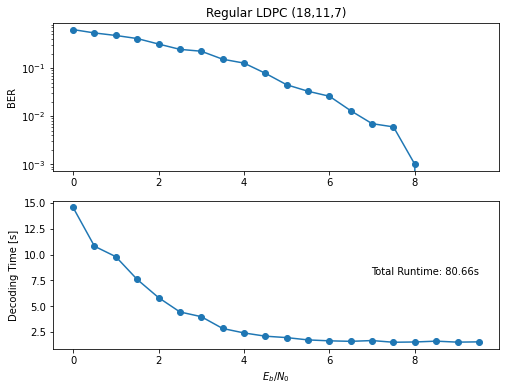

In [39]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs_11,'o-') # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC ({},{},{})'.format(n,k,n-k))
ax2.plot(snrs,times_11,'o-') # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('Total Runtime: {:03.2f}s'.format(np.sum(times_11)),
            xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(n,k))
plt.show()

In [56]:
# parameters for LDPC code
n = 72
d_v = 3
d_c = 6

# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_72 = np.array(())
times_72 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_72=np.append(errs_72,err)
    times_72=np.append(times_72,time_tot)

-> code spec: (72,38,34)
-> var deg: 3
-> check deg: 6
-> H:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
-> G:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 9.74s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 19.02s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 28.60s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 37.71s
SNR: 0.000:
 -> BER: 0.84
 -> Total Time: 95.09s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 8.51s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 16.79s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 24.84s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 32.76s
SNR: 0.500:
 -> BER: 0.72
 -> Total Time: 82.90s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 6.58s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 12.95s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 19.74s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 26.43s
SNR: 1.000:
 -> BER: 0.56
 -> Total Time: 65.70s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 4.28s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 8.73s
SNR: 1.500 - Iter: 750 - Last

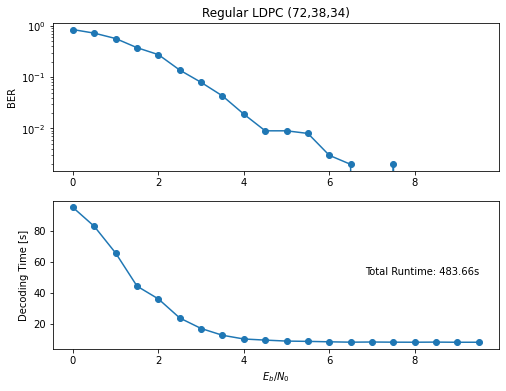

In [57]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs_72,'o-') # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC ({},{},{})'.format(n,k,n-k))
ax2.plot(snrs,times_72,'o-') # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('Total Runtime: {:03.2f}s'.format(np.sum(times_72)),
            xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(n,k))
plt.show()

In [60]:
n = 72
d_v = 2
d_c = 6
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_72_1 = np.array(())
times_72_1 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_72_1=np.append(errs_72_1,err)
    times_72_1=np.append(times_72_1,time_tot)

-> code spec: (72,49,23)
-> var deg: 2
-> check deg: 6
-> H:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-> G:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 7.77s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 15.56s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 23.28s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 31.01s
SNR: 0.000:
 -> BER: 0.99
 -> Total Time: 77.61s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 7.50s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 14.91s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 22.31s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 29.87s
SNR: 0.500:
 -> BER: 0.97
 -> Total Time: 74.58s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 7.24s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 14.55s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 21.71s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 28.99s
SNR: 1.000:
 -> BER: 0.96
 -> Total Time: 72.48s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 5.91s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 11.96s
SNR: 1.500 - Iter: 750 - Las

In [65]:
n = 18
d_v = 2
d_c = 6
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_18_1 = np.array(())
times_18_1 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_18_1=np.append(errs_18_1,err)
    times_18_1=np.append(times_18_1,time_tot)

-> code spec: (18,13,5)
-> var deg: 2
-> check deg: 6
-> H:
 [[1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0]]
-> G:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 1 0 0 1]
 [0 1 1 1 1 0 1 0 0 1 0 0 1]
 [0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]]


/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 1.29s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 2.47s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 3.73s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 4.95s
SNR: 0.000:
 -> BER: 0.78
 -> Total Time: 12.44s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 1.01s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 2.05s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 3.14s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 4.18s
SNR: 0.500:
 -> BER: 0.69
 -> Total Time: 10.38s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.86s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 1.69s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 2.43s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 3.21s
SNR: 1.000:
 -> BER: 0.59
 -> Total Time: 8.18s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.69s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 1.28s
SNR: 1.500 - Iter: 750 - Last 250.0 ite

In [71]:
n = 18
d_v = 8
d_c = 9
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_18_2 = np.array(())
times_18_2 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_18_2=np.append(errs_18_2,err)
    times_18_2=np.append(times_18_2,time_tot)

-> code spec: (18,9,9)
-> var deg: 8
-> check deg: 9
-> H:
 [[1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1]
 [0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0]
 [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0]
 [0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1]
 [1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1]
 [0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1]
 [0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0]
 [0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1]
 [1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0]
 [1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1]
 [0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0]]
-> G:
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]
 [1 1 0 1 0 1 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [1 1 1 1 0 0 0 1 1]
 [0 0 0 1 0 0 1 1 1]
 [1 1 0 1 1 0 1 0 1]
 [0 1 0 1 0 1 

/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 6.93s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 13.99s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 20.31s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 26.96s
SNR: 0.000:
 -> BER: 0.60
 -> Total Time: 68.19s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 5.76s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 11.70s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 17.45s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 23.78s
SNR: 0.500:
 -> BER: 0.56
 -> Total Time: 58.69s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 4.91s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 10.31s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 15.33s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 20.33s
SNR: 1.000:
 -> BER: 0.47
 -> Total Time: 50.88s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 4.30s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 9.09s
SNR: 1.500 - Iter: 750 - Last

In [86]:
n = 12
d_v = 2
d_c = 4
# construct parity check (H) and generator (G) matrices
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
maxiter = 100
print('-> code spec: ({},{},{})\n-> var deg: {}\n-> check deg: {}\n-> H:\n {}\n-> G:\n {}'.format(n,k,n-k,d_v,d_c,H,G))

# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs_12_1 = np.array(())
times_12_1 = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        y = encode(G, v_i, snr)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs_12_1=np.append(errs_12_1,err)
    times_12_1=np.append(times_12_1,time_tot)

-> code spec: (12,8,4)
-> var deg: 2
-> check deg: 4
-> H:
 [[1 0 0 0 1 0 0 0 1 1 0 0]
 [0 1 1 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1 1 0 0 0 1]
 [1 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1 0 0 0 1]]
-> G:
 [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1]]


/usr/local/lib/python3.6/dist-packages/pyldpc/decoder.py:63: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  to increase maxiter""")


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 0.22s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 0.48s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 0.72s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 0.96s
SNR: 0.000:
 -> BER: 0.54
 -> Total Time: 2.38s
SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 0.23s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 0.49s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 0.68s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 0.89s
SNR: 0.500:
 -> BER: 0.50
 -> Total Time: 2.30s
SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.16s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 0.35s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 0.54s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 0.72s
SNR: 1.000:
 -> BER: 0.43
 -> Total Time: 1.77s
SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.15s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 0.32s
SNR: 1.500 - Iter: 750 - Last 250.0 itera

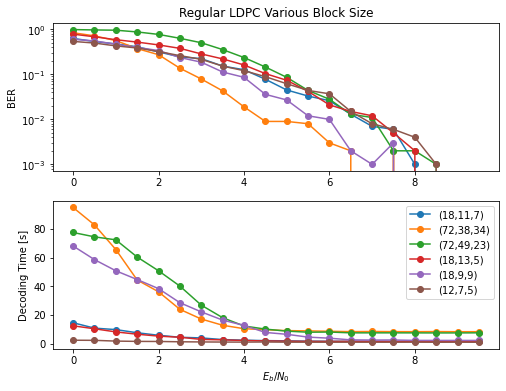

In [88]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs_11,'o-', label="(18,11,7)") # plot BER vs SNR
ax1.semilogy(snrs,errs_72,'o-', label="(72,38,34)") # plot BER vs SNR
ax1.semilogy(snrs,errs_72_1,'o-', label="(72,49,23)") # plot BER vs SNR
ax1.semilogy(snrs,errs_18_1,'o-', label="(18,13,5)") # plot BER vs SNR
ax1.semilogy(snrs,errs_18_2,'o-', label="(18,9,9)") # plot BER vs SNR
ax1.semilogy(snrs,errs_12_1,'o-', label="(12,7,5)") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC Various Block Size')
ax2.plot(snrs,times_11,'o-', label="(18,11,7)") # plot decode timing for different SNRs
ax2.plot(snrs,times_72,'o-', label="(72,38,34)") # plot decode timing for different SNRs
ax2.plot(snrs,times_72_1,'o-', label="(72,49,23)") # plot decode timing for different SNRs
ax2.plot(snrs,times_18_1,'o-', label="(18,13,5)") # plot decode timing for different SNRs
ax2.plot(snrs,times_18_2,'o-', label="(18,9,9)") # plot decode timing for different SNRs
ax2.plot(snrs,times_12_1,'o-', label="(12,7,5)") # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('',xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.legend ()
plt.show()
